# Analysis of Heart Rate Estimation Dataset
---

1. General info : 
    - 15 participants w/ a folder for each
    - Files  
        1. IBI.csv
            - Time between individuals heart beats extracted from the BVP signal. No sample rate is needed for this file. The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s). The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).
        2. EDA.csv
            - Data from the electrodermal activity sensor expressed as microsiemens (μS).

        3. BVP.csv
            - Data from photoplethysmograph.
            
        4. ACC.csv
            - Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range [-2g, 2g]. Therefore the unit in this file is 1/64g.Data from x, y, and z axis are respectively in first, second, and third column.
            

2. TODO : 
    - [ ] W/ code, clean data by adding Files 2 - 4 to 1
        - Reasoning is : We have 3 different sensors & all 3 occur at some time in secs. This is only possible when there's a match from the secs to all 3 sensors, respectively.
    - [ ] Start analyzing for 1 participant
        - [ ] What is important here? Can I generalize this to the other participants?
    - [ ] Once know what to track, do for all participants
        - Should this be done invididually so 15 different files or collectively so clean & organize data into a single file?

In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
def load_data(data):
    
    original_data = pd.read_pickle(data)    
    return original_data

In [3]:
file = "S1.pkl"
path = "../../2-pre_autoTS_and_wings_analysis/heart_rate_estimation/PPG_FieldStudy/S1/"
data = path + file
dataset = load_data(data)
dataset

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224],
       dtype=int32),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
    

In [4]:
# copy dataset so I can make proper adjustments
dataset_copy = dataset.copy()

keys = []
# get the keys
for key in dataset_copy.keys():
    # print("key : ", key)
    keys.append(key)
# Create dataframe only with data we care about
keys

['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']

In [5]:
# set each key
rpeaks = dataset_copy['rpeaks']
signal = dataset_copy['signal']
label = dataset_copy['label']
activity = dataset_copy['activity']
questionnaire = dataset_copy['questionnaire']
subject = dataset_copy['subject']

In [6]:
# set each key
# rpeaks = dataset_copy[keys[0]]
# signal = dataset_copy[keys[1]]
# label = dataset_copy[keys[2]]
# activity = dataset_copy[keys[3]]
# questionnaire = dataset_copy[keys[4]]
# subject = dataset_copy[keys[5]]

In [7]:
chest = signal['chest']
print(chest.keys(), "\n",  "\n", chest)

dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']) 
 
 {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
       [0.01812744],
       [0.01753235],
       ...,
       [0.21368408],
       [0.21556091],
       [0.21702576]]), 'EMG': array([[-1.5],
       [-1.5],
       [-1.5],
       ...,
       [-1.5],
       [-1.5],
       [-1.5]]), 'EDA': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'Temp': array([[-273.15],
       [-273.15],
       [-273.15],
       ...,
       [-273.15],
       [-273.15],
       [-273.15]], dtype=float32), 'Resp': array([[ 4.4418335 ],
       [ 4.45098877],
       [ 4.47387695],
       ...,
       [-3.05023193],
       [-3.05328369]

In [ ]:
acc = chest['ACC']
acc.shape, acc
# acc_df = pd.DataFrame(acc)
# acc_df

# End of Load Data

---

# Sensors
- ECG for heart rate ground truth
- BVP for heart rate on wrist
- ACC for heart rate on wrist

- TODO : 
    - [ ] Check the phenomenon of each sensor

## ECG

In [8]:
len(label), label
heart_rate_measurement = pd.DataFrame(label, columns=['Mean of ECG-based Institaneous Heart Rate Measurement'])
type(heart_rate_measurement), heart_rate_measurement

(pandas.core.frame.DataFrame,
       Mean of ECG-based Institaneous Heart Rate Measurement
 0                                             49.611369    
 1                                             50.323992    
 2                                             52.708336    
 3                                             55.640794    
 4                                             57.658406    
 ...                                                 ...    
 4598                                          74.058629    
 4599                                          80.442006    
 4600                                          84.004991    
 4601                                          85.796257    
 4602                                          87.411399    
 
 [4603 rows x 1 columns])

In [110]:
'''
Check NaN
See : https://datatofish.com/check-nan-pandas-dataframe/
'''

# Check NaN under DataFrame
check_1 = heart_rate_measurement.isnull().values.any()
print("check_1: ", check_1)

# Count NaN under DataFrame
check_2 = heart_rate_measurement.isnull().sum().sum()
print("check_2: ", check_2)

# Less than 0?
neg = heart_rate_measurement.values < 0
d = neg.any()
d

check_1:  False
check_2:  0


False

In [17]:
heart_rate_measurement.min(), heart_rate_measurement.max()

(Heart Rate Measurement    41.862467
 dtype: float64,
 Heart Rate Measurement    150.154572
 dtype: float64)

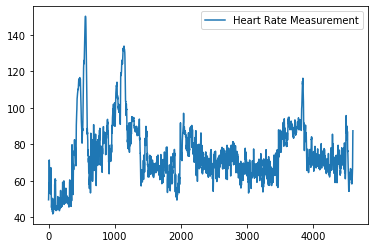

In [27]:
heart_rate_measurement.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4e8b249d0>]],
      dtype=object)

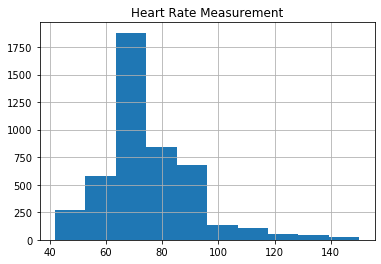

In [28]:
heart_rate_measurement.hist()

## End of ECG

In [18]:
chest = signal['chest']
print("Chest : ", chest)

wrist = signal['wrist']
wrist

Chest :  {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
       [0.01812744],
       [0.01753235],
       ...,
       [0.21368408],
       [0.21556091],
       [0.21702576]]), 'EMG': array([[-1.5],
       [-1.5],
       [-1.5],
       ...,
       [-1.5],
       [-1.5],
       [-1.5]]), 'EDA': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'Temp': array([[-273.15],
       [-273.15],
       [-273.15],
       ...,
       [-273.15],
       [-273.15],
       [-273.15]], dtype=float32), 'Resp': array([[ 4.4418335 ],
       [ 4.45098877],
       [ 4.47387695],
       ...,
       [-3.05023193],
       [-3.05328369],
       [-3.05633545]])}


{'ACC': array([[-0.765625, -0.078125,  0.671875],
        [-0.765625, -0.078125,  0.65625 ],
        [-0.765625, -0.078125,  0.671875],
        ...,
        [-0.375   , -0.015625,  0.9375  ],
        [-0.390625,  0.      ,  0.9375  ],
        [-0.375   ,  0.      ,  0.9375  ]]),
 'BVP': array([[  7.28],
        [  6.33],
        [  5.46],
        ...,
        [105.02],
        [109.44],
        [111.06]]),
 'EDA': array([[4.722437],
        [4.728843],
        [4.718594],
        ...,
        [3.170867],
        [3.159336],
        [3.151649]]),
 'TEMP': array([[32.13],
        [32.16],
        [32.16],
        ...,
        [34.37],
        [34.37],
        [34.37]])}

## BVP

In [55]:
bvp = wrist['BVP']
len(bvp), bvp
hrt_rate = pd.DataFrame(bvp, columns=['BVP Measurements'])
type(hrt_rate), hrt_rate

(pandas.core.frame.DataFrame,
         BVP Measurements
 0                   7.28
 1                   6.33
 2                   5.46
 3                   4.60
 4                   3.74
 ...                  ...
 589563             85.88
 589564             97.30
 589565            105.02
 589566            109.44
 589567            111.06
 
 [589568 rows x 1 columns])

In [111]:
a = hrt_rate.isnull().values.any()
print(a)
b = hrt_rate.isnull().sum().sum()
print(b)
c = hrt_rate.values < 0
d = c.any()
d

False
0


True

In [112]:
hrt_rate.min(), hrt_rate.max()

(BVP Measurements   -1647.39
 dtype: float64,
 BVP Measurements    1557.58
 dtype: float64)

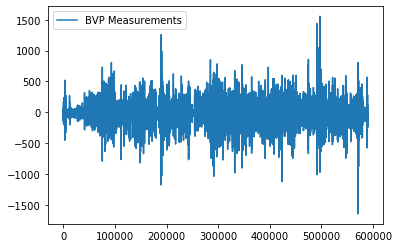

In [113]:
hrt_rate.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd710f4ba10>]],
      dtype=object)

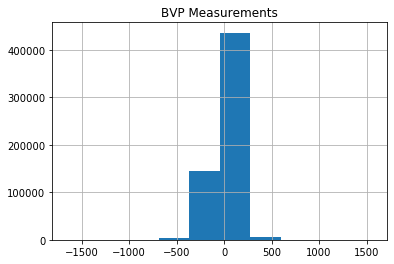

In [115]:
hrt_rate.hist()

## End of BVP

---

## ACC 

In [121]:
acc = wrist['ACC']
len(acc), acc
heart_r = pd.DataFrame(acc, columns=['Accelerometer Channel 1', 'Accelerometer Channel 2', 'Accelerometer Channel 3'])
heart_r

,Accelerometer Channel 1,Accelerometer Channel 2,Accelerometer Channel 3
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.656250
2,-0.765625,-0.078125,0.671875
3,-0.765625,-0.078125,0.671875
4,-0.750000,-0.078125,0.671875
...,...,...,...
294779,-0.375000,0.000000,0.937500
294780,-0.375000,0.000000,0.937500
294781,-0.375000,-0.015625,0.937500
294782,-0.390625,0.000000,0.937500


## End of ACC